In [ ]:
!pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 75.9 MB/s eta 0:00:00


In [ ]:
from tabula.io import read_pdf
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
 dfs = read_pdf("/content/DEMONSTRATIVO ANUAL DE RECEITAS E DESPESAS.pdf", pages='all')

Apr 26, 2023 8:59:34 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Apr 26, 2023 8:59:34 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Apr 26, 2023 8:59:34 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Apr 26, 2023 8:59:39 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Apr 26, 2023 8:59:42 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



## Processamento

In [ ]:
dfs[0]

,Unnamed: 0,Receitas,Unnamed: 1,01/2022,02/2022,03/2022,04/2022,05/2022,06/2022,07/2022,08/2022,09/2022,10/2022,11/2022,12/2022
0,Receitas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taxa de Condomínio,NaN,NaN,"14.302,22","14.289,52","15.494,24","13.877,67","13.918,17","13.877,81","14.287,83","14.300,43","14.286,50","14.293,11","14.315,30","14.301,74"
2,Kit Net A,NaN,NaN,"450,00","450,00","450,00","450,00","450,00","450,00","450,00","450,00","0,00","0,00","0,00","0,00"
3,Água Galeria Chopin,NaN,NaN,"1.360,48","1.360,48","1.360,48","1.360,48","1.853,49","1.853,49","1.853,49","1.853,49","1.853,49","1.853,49","1.853,49","1.853,49"
4,Taxa Extra 13o Salário,NaN,NaN,"100,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
5,Multas e Juros,NaN,NaN,"0,00","0,00","0,00","0,00","0,00","0,00","30,50","0,00","0,00","0,00","0,00","0,00"
6,Ressarcimento,NaN,NaN,"0,00","(82,00)","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
7,"Reforço Férias, 13° Sal e Encargos 13o",NaN,NaN,"0,00","0,00","0,00","1.800,90","2.121,30","1.755,90","1.756,80","1.758,60","1.756,80","1.757,70","1.760,39","1.758,60"
8,Conta Extra,NaN,NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","3.403,40","3.405,10","3.410,21","0,00"
9,Novo Controle da Garagen,NaN,NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","1.384,76","0,00"


### Demonstrativo Anual de Receitas

In [ ]:
def std_float(df): 
  aux_df = df.apply(lambda x: x.str.replace(".", "").str.replace(",", "."), axis=0)
  return aux_df.apply(lambda x: x.apply(float))

In [ ]:
#Tabela DEMONSTRATIVO ANUAL DE RECEITAS
receita_anual = dfs[0]

#Processamento Inicial
receita_anual = receita_anual.drop(["Receitas",	"Unnamed: 1"], axis=1).T.reset_index(drop=True)
receita_anual.drop(0, axis=1, inplace=True)

#Consertando nome de colunas
colunas = receita_anual.loc[0].values
colunas[9] = "Total Sem Rendimentos"
colunas[-1] = "Total Com Rendimentos"
receita_anual.columns = colunas
receita_anual.drop(0, inplace=True)

#Retirando Colunas fantasmas
receita_anual.drop([np.nan, "Resgate", "Rendimento"], axis=1, inplace=True)

receita_anual["Ressarcimento"] = receita_anual["Ressarcimento"].str.replace("(", "").str.replace(")", "")

receita_anual = std_float(receita_anual)

In [ ]:
#Lista Meses
meses = [f"0{i}/2022" if i < 10 else f"{i}/2022" for i in range(1,13)]

In [ ]:
receita_anual["Mês"] = meses

In [ ]:
receita_anual

,Taxa de Condomínio,Kit Net A,Água Galeria Chopin,Taxa Extra 13o Salário,Multas e Juros,Ressarcimento,"Reforço Férias, 13° Sal e Encargos 13o",Conta Extra,Novo Controle da Garagen,Total Sem Rendimentos,Rendimento da Conta Corrente,Resgate CDB-DI,Total Com Rendimentos,Mês
1,14302.22,450.0,1360.48,100.0,0.0,0.0,0.00,0.00,0.00,16212.70,0.28,0.00,16212.98,01/2022
2,14289.52,450.0,1360.48,0.0,0.0,82.0,0.00,0.00,0.00,16018.00,0.19,0.00,16018.19,02/2022
3,15494.24,450.0,1360.48,0.0,0.0,0.0,0.00,0.00,0.00,17304.72,0.22,0.00,17304.94,03/2022
4,13877.67,450.0,1360.48,0.0,0.0,0.0,1800.90,0.00,0.00,17489.05,0.33,0.00,17489.38,04/2022
5,13918.17,450.0,1853.49,0.0,0.0,0.0,2121.30,0.00,0.00,18342.96,0.36,0.00,18343.32,05/2022
6,13877.81,450.0,1853.49,0.0,0.0,0.0,1755.90,0.00,0.00,17937.20,0.42,0.00,17937.62,06/2022
7,14287.83,450.0,1853.49,0.0,30.5,0.0,1756.80,0.00,0.00,18378.62,0.40,0.00,18379.02,07/2022
8,14300.43,450.0,1853.49,0.0,0.0,0.0,1758.60,0.00,0.00,18362.52,0.50,0.00,18363.02,08/2022
9,14286.50,0.0,1853.49,0.0,0.0,0.0,1756.80,3403.40,0.00,21300.19,0.61,0.00,21300.80,09/2022
10,14293.11,0.0,1853.49,0.0,0.0,0.0,1757.70,3405.10,0.00,21309.40,1.93,4001.51,25312.84,10/2022


### Demonstrativo Anual de Despesas

In [ ]:
despesa_anual = dfs[1]

despesa_anual.columns = despesa_anual.loc[0].values
despesa_anual = despesa_anual.drop([0, 1]).T.reset_index(drop=True)

despesa_anual.columns = despesa_anual.loc[0]
despesa_anual = despesa_anual.drop([0, 1]).drop([np.nan, "Contratos", "Despesas Gerais"], axis=1)

despesa_anual = std_float(despesa_anual)

In [ ]:
#Criando mapper para classificação de despesa
tipo_despesa = despesa_anual.columns

mapper = {}
for index in range(len(tipo_despesa)):
  if index <= 14 - 1:
    mapper[tipo_despesa[index]] = "FUNCIONÁRIOS"
  elif index < 22:
    mapper[tipo_despesa[index]] = "CONTRTATOS"
  else:
    mapper[tipo_despesa[index]] = "SERVIÇOS"

despesa_anual.columns

Index(['Salários', 'INSS', 'Pis', 'Fundo de Garantia (FGTS)',
       'Vale Transporte', 'Mensalidade Sindical', 'Confederativa',
       'Pro-Labore Síndica', 'Férias', 'Adiantamento', 'Passagem',
       '13o Salario', 'Guia Rescisória do FGTS',
       'Contribuição Sind Empregados', 'Elevador Manutenção (Powerelev)',
       'Água das Agulhas Negras', 'Energia (Ampla)', 'VR/despesas',
       'Seguro Tokio', 'Atualização Receita Federal', 'Enel', 'Seguro',
       'Elevador Reparos (Powerelev)', 'Cegil Supermercado Mat.Construção',
       'Nahera Com.Material Limpeza', 'Eletro Duda', 'Ressarcimento',
       'Serviço Prestado', 'Pequena Despesas', 'Chaveiro', 'Eletrica Central',
       'Despesas diversas', 'Vatel', 'AMDL Dedetezação Limpeza e Conservação',
       'Lunos Ferragens Hidraulica Elétrica'],
      dtype='object', name=0)

In [ ]:
despesa_anual

,Salários,INSS,Pis,Fundo de Garantia (FGTS),Vale Transporte,Mensalidade Sindical,Confederativa,Pro-Labore Síndica,Férias,Adiantamento,...,Eletro Duda,Ressarcimento,Serviço Prestado,Pequena Despesas,Chaveiro,Eletrica Central,Despesas diversas,Vatel,AMDL Dedetezação Limpeza e Conservação,Lunos Ferragens Hidraulica Elétrica
2,3156.07,1932.40,77.70,621.54,315.2,0.00,102.05,550.0,0.00,1441.0,...,0.0,0.0,120.0,0.0,50.0,0.0,442.80,0.00,0.0,0.0
3,3172.30,3502.00,0.00,414.36,298.5,0.00,102.05,606.0,0.00,1441.0,...,0.0,0.0,200.0,0.0,0.0,0.0,0.00,0.00,0.0,51.4
4,3178.29,1732.34,155.40,414.36,334.9,0.00,102.05,606.0,0.00,1441.0,...,0.0,18.0,700.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
5,3169.30,1675.87,51.79,414.36,179.7,0.00,102.05,606.0,1891.81,1441.0,...,0.0,0.0,740.0,175.0,0.0,0.0,0.00,0.00,0.0,187.5
6,2258.87,1792.09,55.12,440.98,270.5,0.00,102.05,606.0,0.00,1441.0,...,0.0,0.0,670.0,0.0,0.0,107.0,0.00,117.98,0.0,0.0
7,2747.55,1750.51,53.95,431.67,317.7,0.00,102.05,606.0,2469.66,615.0,...,155.0,0.0,0.0,0.0,0.0,74.9,0.00,0.00,0.0,0.0
8,2463.83,1880.29,0.00,460.28,0.0,0.00,0.00,606.0,0.00,1441.0,...,0.0,0.0,0.0,0.0,0.0,75.0,29.92,0.00,0.0,0.0
9,2920.20,1795.72,164.79,429.05,344.1,0.00,102.05,606.0,0.00,1441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
10,3166.31,1675.87,51.79,414.36,308.5,0.00,102.05,606.0,0.00,1513.0,...,120.0,0.0,480.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
11,3689.96,1907.46,58.50,468.06,236.5,0.00,0.00,606.0,2063.46,867.0,...,0.0,0.0,332.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


### Despesas do Condomínio

In [ ]:
despesa_condominio = dfs[2]

despesa_condominio = despesa_condominio.T.reset_index(drop=True)

despesa_condominio.columns = despesa_condominio.loc[0]

despesa_condominio.drop(0, inplace=True)

despesa_condominio.drop(["Tarifa", np.nan, "Aplicação"], axis=1, inplace=True)
despesa_condominio = std_float(despesa_condominio)

In [ ]:
despesa_condominio

,Eletro Estrela Triangulo Manutenção,JMC Tintas,Eletrika Rio,Proteg,Gomes Mathues Material Eletrico,Tarifa Bancaria Mensal,Aplicação CDB-DI
1,0.0,0.0,0.0,0.00,0.0,340.58,0.0
2,0.0,0.0,350.0,0.00,0.0,368.27,0.0
3,0.0,0.0,0.0,0.00,0.0,387.60,0.0
4,0.0,0.0,350.0,0.00,0.0,367.70,0.0
5,0.0,80.0,0.0,0.00,0.0,402.18,0.0
6,0.0,0.0,0.0,0.00,0.0,340.50,0.0
7,0.0,0.0,0.0,0.00,0.0,358.00,0.0
8,0.0,0.0,0.0,0.00,0.0,365.13,0.0
9,870.0,0.0,0.0,0.00,0.0,363.38,0.0
10,396.0,0.0,0.0,160.00,0.0,348.34,10000.0


## Visualizações

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

### Receitas Gerais

In [ ]:
receita_anual

,Taxa de Condomínio,Kit Net A,Água Galeria Chopin,Taxa Extra 13o Salário,Multas e Juros,Ressarcimento,"Reforço Férias, 13° Sal e Encargos 13o",Conta Extra,Novo Controle da Garagen,Total Sem Rendimentos,Rendimento da Conta Corrente,Resgate CDB-DI,Total Com Rendimentos,Mês
1,14302.22,450.0,1360.48,100.0,0.0,0.0,0.00,0.00,0.00,16212.70,0.28,0.00,16212.98,01/2022
2,14289.52,450.0,1360.48,0.0,0.0,82.0,0.00,0.00,0.00,16018.00,0.19,0.00,16018.19,02/2022
3,15494.24,450.0,1360.48,0.0,0.0,0.0,0.00,0.00,0.00,17304.72,0.22,0.00,17304.94,03/2022
4,13877.67,450.0,1360.48,0.0,0.0,0.0,1800.90,0.00,0.00,17489.05,0.33,0.00,17489.38,04/2022
5,13918.17,450.0,1853.49,0.0,0.0,0.0,2121.30,0.00,0.00,18342.96,0.36,0.00,18343.32,05/2022
6,13877.81,450.0,1853.49,0.0,0.0,0.0,1755.90,0.00,0.00,17937.20,0.42,0.00,17937.62,06/2022
7,14287.83,450.0,1853.49,0.0,30.5,0.0,1756.80,0.00,0.00,18378.62,0.40,0.00,18379.02,07/2022
8,14300.43,450.0,1853.49,0.0,0.0,0.0,1758.60,0.00,0.00,18362.52,0.50,0.00,18363.02,08/2022
9,14286.50,0.0,1853.49,0.0,0.0,0.0,1756.80,3403.40,0.00,21300.19,0.61,0.00,21300.80,09/2022
10,14293.11,0.0,1853.49,0.0,0.0,0.0,1757.70,3405.10,0.00,21309.40,1.93,4001.51,25312.84,10/2022


In [ ]:
fig = go.Figure(layout=go.Layout(width=2e3, height=600))

filtro_receitas = ["Kit Net A", "Água Galeria Chopin", "Taxa Extra 13o Salário", "Reforço Férias, 13° Sal e Encargos 13o"]

for fonte_receita in filtro_receitas:
  fig.add_trace(go.Scatter(x=receita_anual["Mês"], y=receita_anual[fonte_receita].round(0),
                       name=fonte_receita,
                       text=receita_anual[fonte_receita].round(0),
                       textposition='top center',
                       mode="markers+lines+text",
                       texttemplate="R$%{text:.0f}"))

fig.update_layout(bargap=0.5)
fig.update_layout(title=dict(text="Evolução da Receita Durante o Ano de 2022 - ", x=0.4),
                  xaxis_title="Mês",
                  yaxis_title="Valor")
fig.show()

In [ ]:
receita_anual["Reforço Férias, 13° Sal e Encargos 13o"].loc[6:12].mean().round(2)

1757.83

In [ ]:
#Total no Ano
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

filtro_receitas = ["Kit Net A", "Água Galeria Chopin", "Taxa Extra 13o Salário", "Reforço Férias, 13° Sal e Encargos 13o"]

aux_df = receita_anual[filtro_receitas]
aux_df["Receita Total"] = aux_df.sum(axis=1)
aux_df["Mês"] = receita_anual["Mês"]

color_sequence = ["rgb(67, 147, 195)", "rgb(241,196,15)", "rgb(219, 68, 55)", "rgb(46,204,113)", "rgb(241,196,15)"]
columns = aux_df.columns[:-1]

for fonte_receita, cor in zip(columns, color_sequence):

  if fonte_receita == "Receita Total":
    fig.add_trace(go.Scatter(x=aux_df["Mês"], y=aux_df[fonte_receita].round(0),
                        name=fonte_receita,
                        text=aux_df[fonte_receita].apply(lambda x: "R$ " + str(np.round(x,0))).str.split(".").str.get(0),
                        textposition='top center',
                        mode="markers+lines+text"
                         ), secondary_y=True)
  else:
    fig.add_trace(go.Bar(x=aux_df["Mês"], y=aux_df[fonte_receita].round(0),
                        name=fonte_receita,
                        marker=dict(color=cor),
                        orientation="v"), secondary_y=False)
  
fig.update_layout(bargap=0.5)
fig.update_layout(title=dict(text="Evolução da Receita Durante o Ano de 2022 - Receitas Fixas", x=0.4),
                  xaxis_title="Mês",
                  yaxis_title="Valor",
                  template="simple_white")

fig.update_layout(
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray'
    ))

fig.update_traces(textfont=dict(size=13.5))
fig.show()

### Evolução da Receita Geral em comparativo com a Taxa de Condomínio

In [ ]:
receita_anual

,Taxa de Condomínio,Kit Net A,Água Galeria Chopin,Taxa Extra 13o Salário,Multas e Juros,Ressarcimento,"Reforço Férias, 13° Sal e Encargos 13o",Conta Extra,Novo Controle da Garagen,Total Sem Rendimentos,Rendimento da Conta Corrente,Resgate CDB-DI,Total Com Rendimentos,Mês
1,14302.22,450.0,1360.48,100.0,0.0,0.0,0.00,0.00,0.00,16212.70,0.28,0.00,16212.98,01/2022
2,14289.52,450.0,1360.48,0.0,0.0,82.0,0.00,0.00,0.00,16018.00,0.19,0.00,16018.19,02/2022
3,15494.24,450.0,1360.48,0.0,0.0,0.0,0.00,0.00,0.00,17304.72,0.22,0.00,17304.94,03/2022
4,13877.67,450.0,1360.48,0.0,0.0,0.0,1800.90,0.00,0.00,17489.05,0.33,0.00,17489.38,04/2022
5,13918.17,450.0,1853.49,0.0,0.0,0.0,2121.30,0.00,0.00,18342.96,0.36,0.00,18343.32,05/2022
6,13877.81,450.0,1853.49,0.0,0.0,0.0,1755.90,0.00,0.00,17937.20,0.42,0.00,17937.62,06/2022
7,14287.83,450.0,1853.49,0.0,30.5,0.0,1756.80,0.00,0.00,18378.62,0.40,0.00,18379.02,07/2022
8,14300.43,450.0,1853.49,0.0,0.0,0.0,1758.60,0.00,0.00,18362.52,0.50,0.00,18363.02,08/2022
9,14286.50,0.0,1853.49,0.0,0.0,0.0,1756.80,3403.40,0.00,21300.19,0.61,0.00,21300.80,09/2022
10,14293.11,0.0,1853.49,0.0,0.0,0.0,1757.70,3405.10,0.00,21309.40,1.93,4001.51,25312.84,10/2022


In [ ]:
#Separar em receitas > 10k para melhorar visualização
fig = go.Figure(layout=go.Layout(width=1.5e3, height=600))

treshold_receitas = receita_anual[(receita_anual.iloc[:, :-1] > 10e3)].dropna(how="all", axis=1).columns

for fonte_receita in treshold_receitas:
  fig.add_trace(go.Scatter(x=receita_anual["Mês"], y=receita_anual[fonte_receita].round(0),
                       name=fonte_receita,
                       text=receita_anual[fonte_receita].round(0)/1000,
                       textposition='top center',
                       mode="markers+lines+text",
                       texttemplate="R$%{text:.1f}k"))

fig.update_layout(bargap=0.5)
fig.update_layout(title=dict(text="Evolução da Receita Durante o Ano de 2022 (milhares)", x=0.5),
                  xaxis_title="Mês",
                  yaxis_title="Valor")

fig.update_layout(template="simple_white")

fig.update_layout(
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray'
    ))
fig.show()

In [ ]:
a = ["Mês", 'Taxa de Condomínio', 'Total Sem Rendimentos', 'Total Com Rendimentos']
receita_anual["Ano"] = receita_anual["Mês"].str.split("/").str.get(1)

In [ ]:
func = lambda x: "R$ " + str(x)

In [ ]:
receita_anual.groupby(["Ano"]).sum().apply(lambda x: x.apply(func)).drop("Rendimento da Conta Corrente", axis=1).T.sort_values("2022", ascending=False)

Ano,2022
Taxa de Condomínio,R$ 171544.54
Kit Net A,R$ 3600.0
Água Galeria Chopin,R$ 20269.84
Taxa Extra 13o Salário,R$ 100.0
Multas e Juros,R$ 30.5
Ressarcimento,R$ 82.0
"Reforço Férias, 13° Sal e Encargos 13o",R$ 16226.99
Conta Extra,R$ 10218.71
Novo Controle da Garagen,R$ 1384.76
Total Sem Rendimentos,R$ 223293.34


### Análise das Despesas

In [ ]:
despesa_anual['Mês'] = meses

Despesas são divididas em 3 grupos:
- Funcionários
- Contratos
- Despesas Gerais

Vamos comparar os gastos totais com cada um desses tópicos

In [ ]:
#Funcionários
func_list = list(despesa_anual.columns[:14])
func_list.append(despesa_anual.columns[-1])
df_funcionarios = despesa_anual[func_list]
df_funcionarios["Total"] = df_funcionarios.sum(axis=1)

In [ ]:
df_funcionarios

,Salários,INSS,Pis,Fundo de Garantia (FGTS),Vale Transporte,Mensalidade Sindical,Confederativa,Pro-Labore Síndica,Férias,Adiantamento,Passagem,13o Salario,Guia Rescisória do FGTS,Contribuição Sind Empregados,Mês,Total
2,3156.07,1932.40,77.70,621.54,315.2,0.00,102.05,550.0,0.00,1441.0,0.0,0.00,0.00,0.00,01/2022,8195.96
3,3172.30,3502.00,0.00,414.36,298.5,0.00,102.05,606.0,0.00,1441.0,0.0,0.00,0.00,0.00,02/2022,9536.21
4,3178.29,1732.34,155.40,414.36,334.9,0.00,102.05,606.0,0.00,1441.0,0.0,0.00,0.00,0.00,03/2022,7964.34
5,3169.30,1675.87,51.79,414.36,179.7,0.00,102.05,606.0,1891.81,1441.0,0.0,0.00,0.00,0.00,04/2022,9531.88
6,2258.87,1792.09,55.12,440.98,270.5,0.00,102.05,606.0,0.00,1441.0,0.0,0.00,0.00,0.00,05/2022,6966.61
7,2747.55,1750.51,53.95,431.67,317.7,0.00,102.05,606.0,2469.66,615.0,0.0,0.00,0.00,0.00,06/2022,9094.09
8,2463.83,1880.29,0.00,460.28,0.0,0.00,0.00,606.0,0.00,1441.0,325.7,0.00,0.00,102.05,07/2022,7279.15
9,2920.20,1795.72,164.79,429.05,344.1,0.00,102.05,606.0,0.00,1441.0,0.0,0.00,0.00,0.00,08/2022,7802.91
10,3166.31,1675.87,51.79,414.36,308.5,0.00,102.05,606.0,0.00,1513.0,0.0,0.00,0.00,0.00,09/2022,7837.88
11,3689.96,1907.46,58.50,468.06,236.5,0.00,0.00,606.0,2063.46,867.0,0.0,0.00,0.00,102.05,10/2022,9998.99


In [ ]:
import plotly.colors as plotly_colors

num_cores = 14

paleta_sequencial = 'Viridis'

# Gerar lista de cores em formato RGB da paleta sequencial do Plotly
cores_rgb = plotly_colors.sequential.Viridis#[paleta_sequencial][num_cores]

# Exibir a lista de cores em formato RGB
print(len(cores_rgb))

10


In [ ]:
#fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
         '#ff00ff', '#00ff00', '#ff0000', '#0000ff']



for i, col in enumerate(df_funcionarios.drop("Mês", axis=1).columns):
  if col == "Total":
    fig.add_trace(go.Scatter(x=df_funcionarios["Mês"], y=df_funcionarios[col].round(0),
                        name=col,
                        text=df_funcionarios[col].apply(lambda x: "R$ " + str(np.round(x,0))).str.split(".").str.get(0),
                        textposition='top center',
                        mode="markers+lines+text"
                         ), secondary_y=True)
  else:
    fig.add_trace(go.Bar(
        x=df_funcionarios['Mês'],
        y=df_funcionarios[col],
        name=col,
        text=(df_funcionarios[col]/df_funcionarios["Total"]*100).round(1),
        textposition="inside",
        texttemplate= "%{text}%",
        marker_color=cores[i % len(cores)]
    ))

    
fig.update_layout(
    title='Gráfico de Barras Empilhadas',
    xaxis=dict(title='Mês'),
    yaxis=dict(title='Valores'),
    barmode='stack',
    width=1.8e3,  
    height=800,
    template="simple_white"
)

fig.update_layout(
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray'
    ))

fig.show()

Ao invés de mostrar por categoria, vamos mostrar o total de cada categoria por mês

Depois mostrar a maior despesa de cada categoria (deep dive)

In [ ]:
despesa_anual

,Salários,INSS,Pis,Fundo de Garantia (FGTS),Vale Transporte,Mensalidade Sindical,Confederativa,Pro-Labore Síndica,Férias,Adiantamento,...,Ressarcimento,Serviço Prestado,Pequena Despesas,Chaveiro,Eletrica Central,Despesas diversas,Vatel,AMDL Dedetezação Limpeza e Conservação,Lunos Ferragens Hidraulica Elétrica,Mês
2,3156.07,1932.40,77.70,621.54,315.2,0.00,102.05,550.0,0.00,1441.0,...,0.0,120.0,0.0,50.0,0.0,442.80,0.00,0.0,0.0,01/2022
3,3172.30,3502.00,0.00,414.36,298.5,0.00,102.05,606.0,0.00,1441.0,...,0.0,200.0,0.0,0.0,0.0,0.00,0.00,0.0,51.4,02/2022
4,3178.29,1732.34,155.40,414.36,334.9,0.00,102.05,606.0,0.00,1441.0,...,18.0,700.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,03/2022
5,3169.30,1675.87,51.79,414.36,179.7,0.00,102.05,606.0,1891.81,1441.0,...,0.0,740.0,175.0,0.0,0.0,0.00,0.00,0.0,187.5,04/2022
6,2258.87,1792.09,55.12,440.98,270.5,0.00,102.05,606.0,0.00,1441.0,...,0.0,670.0,0.0,0.0,107.0,0.00,117.98,0.0,0.0,05/2022
7,2747.55,1750.51,53.95,431.67,317.7,0.00,102.05,606.0,2469.66,615.0,...,0.0,0.0,0.0,0.0,74.9,0.00,0.00,0.0,0.0,06/2022
8,2463.83,1880.29,0.00,460.28,0.0,0.00,0.00,606.0,0.00,1441.0,...,0.0,0.0,0.0,0.0,75.0,29.92,0.00,0.0,0.0,07/2022
9,2920.20,1795.72,164.79,429.05,344.1,0.00,102.05,606.0,0.00,1441.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,08/2022
10,3166.31,1675.87,51.79,414.36,308.5,0.00,102.05,606.0,0.00,1513.0,...,0.0,480.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,09/2022
11,3689.96,1907.46,58.50,468.06,236.5,0.00,0.00,606.0,2063.46,867.0,...,0.0,332.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,10/2022


Gerar coluna com total de cada categoria

In [ ]:
#Funcionários
total_por_categoria = pd.DataFrame()
total_por_categoria["Mês"] = meses
total_por_categoria["Total Funcionários"] = despesa_anual[despesa_anual.columns[:14]].sum(axis=1).reset_index(drop=True)
total_por_categoria["Total Contratos"] = despesa_anual[despesa_anual.columns[14:22]].sum(axis=1).reset_index(drop=True)
total_por_categoria["Total Despesas Gerais"] = despesa_anual[despesa_anual.columns[22:-1]].sum(axis=1).reset_index(drop=True)

In [ ]:
fig = go.Figure()

color_sequence = ["rgb(67, 147, 195)", "rgb(241,196,15)", "rgb(219, 68, 55)"]

for col, cor in zip(total_por_categoria.columns[1::], color_sequence):
  fig.add_trace(go.Bar(x=total_por_categoria["Mês"], y=total_por_categoria[col].round(0),
                        name=col,
                        marker=dict(color=cor),
                        text = total_por_categoria[col].round(0),
                        textposition="outside",
                        texttemplate= "R$ %{text}"))
  
  
fig.update_layout(title=dict(text="Comparação dos 3 Tipos de Despesas durante o Ano de 2022", x=0.5),
    xaxis=dict(title='Mês'),
    yaxis=dict(title='Valor Total'),
    width=2e3,  
    height=600,
    template="simple_white"
)

fig.update_layout(
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='LightGray'
    ))

fig.update_layout(bargap=0.3)

fig.show()

In [ ]:
total_por_categoria["Total"] = total_por_categoria.sum(axis=1)
total_por_categoria

,Mês,Total Funcionários,Total Contratos,Total Despesas Gerais,Total
0,01/2022,8195.96,6512.26,951.40,15659.62
1,02/2022,9536.21,6573.36,550.98,16660.55
2,03/2022,7964.34,7166.10,1097.23,16227.67
3,04/2022,9531.88,8309.01,1352.95,19193.84
4,05/2022,6966.61,8269.82,1057.63,16294.06
5,06/2022,9094.09,8269.66,587.00,17950.75
6,07/2022,7279.15,8633.94,409.36,16322.45
7,08/2022,7802.91,9257.85,0.00,17060.76
8,09/2022,7837.88,6803.70,3358.90,18000.48
9,10/2022,9998.99,8722.25,721.93,19443.17


Gerando gráfico de balanço financeiro

In [ ]:
receita_anual

,Taxa de Condomínio,Kit Net A,Água Galeria Chopin,Taxa Extra 13o Salário,Multas e Juros,Ressarcimento,"Reforço Férias, 13° Sal e Encargos 13o",Conta Extra,Novo Controle da Garagen,Total Sem Rendimentos,Rendimento da Conta Corrente,Resgate CDB-DI,Total Com Rendimentos,Mês,Ano
1,14302.22,450.0,1360.48,100.0,0.0,0.0,0.00,0.00,0.00,16212.70,0.28,0.00,16212.98,01/2022,2022
2,14289.52,450.0,1360.48,0.0,0.0,82.0,0.00,0.00,0.00,16018.00,0.19,0.00,16018.19,02/2022,2022
3,15494.24,450.0,1360.48,0.0,0.0,0.0,0.00,0.00,0.00,17304.72,0.22,0.00,17304.94,03/2022,2022
4,13877.67,450.0,1360.48,0.0,0.0,0.0,1800.90,0.00,0.00,17489.05,0.33,0.00,17489.38,04/2022,2022
5,13918.17,450.0,1853.49,0.0,0.0,0.0,2121.30,0.00,0.00,18342.96,0.36,0.00,18343.32,05/2022,2022
6,13877.81,450.0,1853.49,0.0,0.0,0.0,1755.90,0.00,0.00,17937.20,0.42,0.00,17937.62,06/2022,2022
7,14287.83,450.0,1853.49,0.0,30.5,0.0,1756.80,0.00,0.00,18378.62,0.40,0.00,18379.02,07/2022,2022
8,14300.43,450.0,1853.49,0.0,0.0,0.0,1758.60,0.00,0.00,18362.52,0.50,0.00,18363.02,08/2022,2022
9,14286.50,0.0,1853.49,0.0,0.0,0.0,1756.80,3403.40,0.00,21300.19,0.61,0.00,21300.80,09/2022,2022
10,14293.11,0.0,1853.49,0.0,0.0,0.0,1757.70,3405.10,0.00,21309.40,1.93,4001.51,25312.84,10/2022,2022


In [ ]:
balanco_financeiro = total_por_categoria[["Total"]]
balanco_financeiro["Despesas"] = despesa_condominio.sum(axis=1).reset_index(drop=True) + balanco_financeiro["Total"]
balanco_financeiro["Receita"] = receita_anual["Total Com Rendimentos"].reset_index(drop=True)
balanco_financeiro["Total no Mes"] = balanco_financeiro["Receita"] - balanco_financeiro["Despesas"]
balanco_financeiro = balanco_financeiro.drop("Total", axis=1)

In [ ]:
receita_anual

,Taxa de Condomínio,Kit Net A,Água Galeria Chopin,Taxa Extra 13o Salário,Multas e Juros,Ressarcimento,"Reforço Férias, 13° Sal e Encargos 13o",Conta Extra,Novo Controle da Garagen,Total Sem Rendimentos,Rendimento da Conta Corrente,Resgate CDB-DI,Total Com Rendimentos,Mês,Ano
1,14302.22,450.0,1360.48,100.0,0.0,0.0,0.00,0.00,0.00,16212.70,0.28,0.00,16212.98,01/2022,2022
2,14289.52,450.0,1360.48,0.0,0.0,82.0,0.00,0.00,0.00,16018.00,0.19,0.00,16018.19,02/2022,2022
3,15494.24,450.0,1360.48,0.0,0.0,0.0,0.00,0.00,0.00,17304.72,0.22,0.00,17304.94,03/2022,2022
4,13877.67,450.0,1360.48,0.0,0.0,0.0,1800.90,0.00,0.00,17489.05,0.33,0.00,17489.38,04/2022,2022
5,13918.17,450.0,1853.49,0.0,0.0,0.0,2121.30,0.00,0.00,18342.96,0.36,0.00,18343.32,05/2022,2022
6,13877.81,450.0,1853.49,0.0,0.0,0.0,1755.90,0.00,0.00,17937.20,0.42,0.00,17937.62,06/2022,2022
7,14287.83,450.0,1853.49,0.0,30.5,0.0,1756.80,0.00,0.00,18378.62,0.40,0.00,18379.02,07/2022,2022
8,14300.43,450.0,1853.49,0.0,0.0,0.0,1758.60,0.00,0.00,18362.52,0.50,0.00,18363.02,08/2022,2022
9,14286.50,0.0,1853.49,0.0,0.0,0.0,1756.80,3403.40,0.00,21300.19,0.61,0.00,21300.80,09/2022,2022
10,14293.11,0.0,1853.49,0.0,0.0,0.0,1757.70,3405.10,0.00,21309.40,1.93,4001.51,25312.84,10/2022,2022


In [ ]:
balanco_financeiro["Total no Mes"].cumsum()

0      212.78
1    -1147.85
2     -458.18
3    -2880.34
4    -1313.26
5    -1666.89
6       31.68
7      968.81
8     3035.75
9    -1998.92
10   -2534.87
11   -1685.95
Name: Total no Mes, dtype: float64

In [ ]:
receita_anual.loc[10]

Taxa de Condomínio                        14293.11
Kit Net A                                      0.0
Água Galeria Chopin                        1853.49
Taxa Extra 13o Salário                         0.0
Multas e Juros                                 0.0
Ressarcimento                                  0.0
Reforço Férias, 13° Sal e Encargos 13o      1757.7
Conta Extra                                 3405.1
Novo Controle da Garagen                       0.0
Total Sem Rendimentos                      21309.4
Rendimento da Conta Corrente                  1.93
Resgate CDB-DI                             4001.51
Total Com Rendimentos                     25312.84
Mês                                        10/2022
Ano                                           2022
Name: 10, dtype: object

In [ ]:
balanco_financeiro.loc[9]

Despesas        30347.51
Receita         25312.84
Total no Mes    -5034.67
Name: 9, dtype: float64

<Axes: >

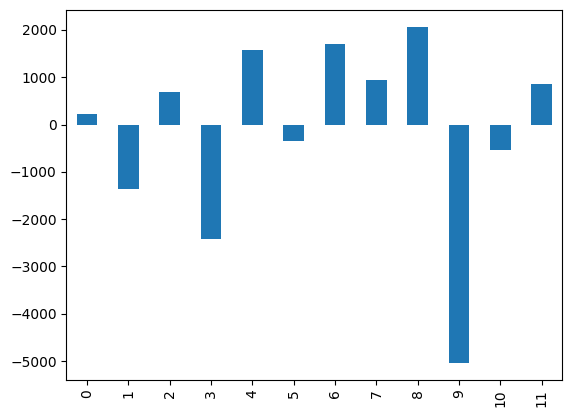

In [ ]:
balanco_financeiro["Total no Mes"].plot(kind='bar')

In [ ]:
receita_anual["Total Com Rendimentos"].sum()

233396.55